# Algorithme problèmes Bandits 

In [75]:
import numpy as np
import pandas as pd
import random 
import matplotlib.pyplot as plt
import math

## Datasets 

In [3]:
with open("CTR.txt","r") as f:
    data = f.read()


data = pd.read_csv('CTR.txt', sep=":", header=None)
data.columns = ["num", "rpz", "annonceurs"]

In [15]:
data

,num,rpz,annonceurs
0,0,0.74837091377052;0.8352077827766918;0.07669895...,0.10341905704918021;0.19069778281037159;0.0;0....
1,1,0.16841851887985582;0.1337544632704264;0.43486...,0.0;0.0;0.0;0.020827097947315257;0.0;0.0;0.022...
2,2,0.4852873193263283;0.5669886866963504;0.041657...,0.10957461446818696;0.13662644655693568;0.0;0....
3,3,0.6222307845696199;0.1961234321879859;0.131146...,0.0;0.1510688622593973;0.0;0.12723939195229092...
4,4,0.3317104123038488;0.08641097481469784;0.02303...,0.0;0.10921436423915529;0.0;0.1519378203628299...
...,...,...,...
4995,4995,0.8847732370748654;0.5731882759746895;0.440228...,0.0;0.05007883134113245;0.0;0.3519598971948565...
4996,4996,0.3568032306006519;0.4809059375216157;0.770139...,0.0;0.09108980548378914;0.05369166041364841;0....
4997,4997,0.9067249784657254;0.26443307534775906;0.68915...,0.0;0.08915824750041476;0.0;0.3575199320125416...
4998,4998,0.36209240899409867;0.710643406255589;0.020285...,0.04174618376396523;0.24481708424090898;0.0;0....


## Baselines

### Random Strategy

In [22]:
random_strategy_cumul = [] 


reward_tot = 0
for i in range(len(data["num"])):
    choix = float(data["annonceurs"][i].split(";")[random.randint(0,9)])
    reward_tot+=choix
    random_strategy_cumul.append(reward_tot)


print("Random reward total : ",reward_tot)
    

Random reward total :  399.91611484825046


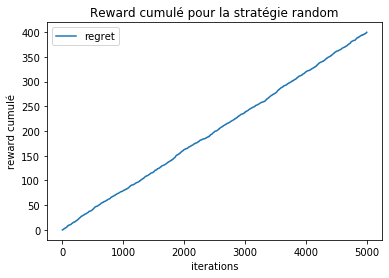

In [58]:
plt.title("Reward cumulé pour la stratégie random")
plt.xlabel("iterations")
plt.ylabel("reward cumulé")
plt.plot(np.arange(len(data)), np.array(random_strategy_cumul), label="regret")
plt.legend()
plt.show()

### Static Best

In [59]:
# On représente la table des annonceurs de manière plus claire.
L = []
for i in range(len(data)):
    d = data["annonceurs"][i]
    d=d.split(";")
    d = [float(k) for k in d]
    L.append(d)

tab_ann = np.vstack(L)

In [73]:
L = []
for i in range(len(data)):
    d = data["rpz"][i]
    d=d.split(";")
    d = [float(k) for k in d]
    L.append(d)

context = np.vstack(L)

In [60]:
len(np.sum(tab_ann[:2],axis=0))

10

In [61]:
# Static Best
reward_tot = 0
static_best_strategy_cumul = []
for i in range(len(data)):
    somme = np.sum(tab_ann[:i],axis=0)
    action = np.argmax(somme)
    choix = float(data["annonceurs"][i].split(";")[np.argmax(somme)])
    reward_tot+=choix
    static_best_strategy_cumul.append(reward_tot)

print("Static best reward total : ",reward_tot)

Static best reward total :  1339.33095464334


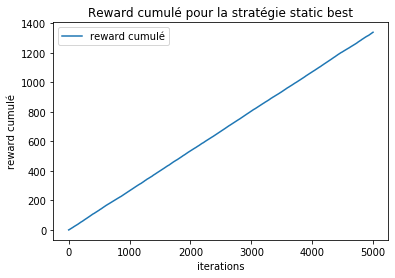

In [62]:
plt.title("Reward cumulé pour la stratégie static best")
plt.xlabel("iterations")
plt.ylabel("reward cumulé")
plt.plot(np.arange(len(data)), np.array(static_best_strategy_cumul), label="reward cumulé")
plt.legend()
plt.show()

### Stratégie optimale

In [63]:
reward_tot = 0
optimal_strategy_cumul = []
for i in range(len(data)):
    reward_tot+=np.max(tab_ann[i])
    optimal_strategy_cumul.append(reward_tot)

print("Optimal best reward total : ",reward_tot)

Optimal best reward total :  1532.0032357358132


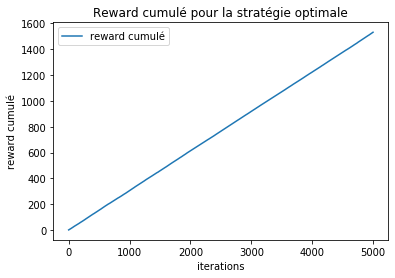

In [64]:
plt.title("Reward cumulé pour la stratégie optimale")
plt.xlabel("iterations")
plt.ylabel("reward cumulé")
plt.plot(np.arange(len(data)), np.array(optimal_strategy_cumul), label="reward cumulé")
plt.legend()
plt.show()

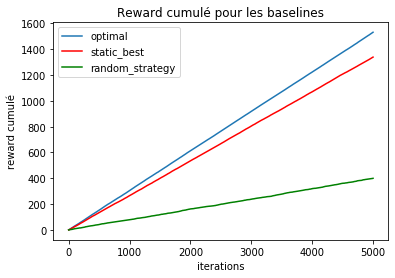

In [65]:
# Comparaison baseline
plt.title("Reward cumulé pour les baselines")
plt.xlabel("iterations")
plt.ylabel("reward cumulé")
plt.plot(np.arange(len(data)), np.array(optimal_strategy_cumul), label="optimal")
plt.plot(np.arange(len(data)), np.array(static_best_strategy_cumul), label="static_best",color='red')
plt.plot(np.arange(len(data)), np.array(random_strategy_cumul), label="random_strategy",color='green')
plt.legend()
plt.show()

## UCB

In [66]:
def ucb(u,s,t):
    return np.argmax(u+np.sqrt(2*np.log(t)/s))


u=np.zeros(tab_ann.shape[1])
s=np.zeros(tab_ann.shape[1])
reward_tot = 0
ucb_strategy_cumul = []
for i in range(len(s)):
    s[i]+=1
    u[i]+=tab_ann[i][i]
    reward_tot +=tab_ann[i][i]
    ucb_strategy_cumul.append(reward_tot)
for i in range(len(s),len(tab_ann)):
    choix=ucb(u,s,i)
    reward_tot += tab_ann[i][choix]
    ucb_strategy_cumul.append(reward_tot)
    u[choix]+=tab_ann[i][choix]
    s[choix]+=1
    
print("UCB reward total : ",reward_tot)

UCB reward total :  1336.6584805303376


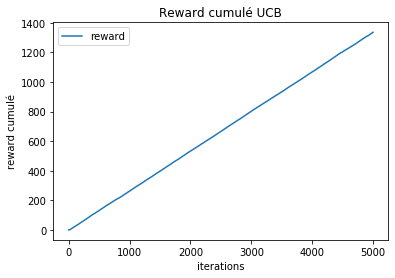

In [67]:
plt.title("Reward cumulé UCB")
plt.xlabel("iterations")
plt.ylabel("reward cumulé")
plt.plot(np.arange(len(data)), np.array(ucb_strategy_cumul), label="reward")
plt.legend()
plt.show()

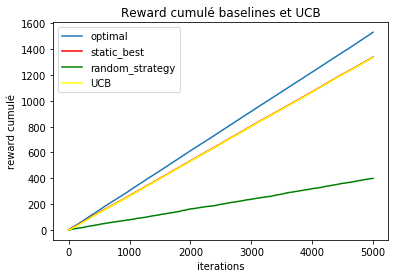

In [69]:
# Comparaison baseline UCB 
plt.title("Reward cumulé baselines et UCB")
plt.xlabel("iterations")
plt.ylabel("reward cumulé")
plt.plot(np.arange(len(data)), np.array(optimal_strategy_cumul), label="optimal")
plt.plot(np.arange(len(data)), np.array(static_best_strategy_cumul), label="static_best",color='red')
plt.plot(np.arange(len(data)), np.array(random_strategy_cumul), label="random_strategy",color='green')
plt.plot(np.arange(len(data)), np.array(ucb_strategy_cumul), label="UCB",color = 'yellow')
plt.legend()
plt.show()

## Lin-UCB

In [70]:
class linUCB :
    D=list(np.zeros((10,1,5)))
    C=list(np.zeros((10,)))
    t=0
    alpha=0.0
    def __init__(self,delta):
        self.alpha=1.0+math.sqrt(math.log10(2/delta)/2)
        
    def get_choice(self,ctx):
        if self.t<10 :
            return self.t
        else :
            #print(np.linalg.inv(self.D[0].T.dot(self.D[0]) + np.identity(5)).dot(self.D[0].T).reshape(5,-1).dot(self.C[0]))
            #print(self.C[0])
            theta =np.array([np.linalg.inv(self.D[i].T.dot(self.D[i]) + np.identity(5)).dot(self.D[i].T).reshape(5,-1).dot(self.C[i]) for i in range(10)])
            bounds = np.array([theta[i].T.dot(ctx) + self.alpha*math.sqrt(ctx.T.dot(np.linalg.inv(self.D[i].T.dot(self.D[i]) + np.identity(5))).dot(ctx)) for i in range(10)])
            return np.argmax(bounds)

    def update(self,ctx,a,r):
        
        if self.t<10 :
            self.D[a]=np.array([ctx])
            self.C[a]=np.array([r])
        else :
            #print(self.D[a])
            #print(np.array([ctx]))
            #print(np.concatenate((self.D[a],np.array([ctx])),axis=0))
            tmpD=np.concatenate((self.D[a],np.array([ctx])),axis=0)
            self.D[a] = self.D[a].reshape((-1,5))
            self.D[a] = tmpD
            #print(self.C)
            #print(self.C[a])
            #print(np.array([r]))
            #print(np.append(self.C[a],np.array([r]),axis=0))
            self.C[a]=np.append(self.C[a],np.array([r]),axis=0)
        self.t+=1
            

In [71]:
def eval(ctx, rwd, policy):
    rewards = []
    sumReward = 0
    for i in range(len(ctx)):
        a = policy.get_choice(ctx[i])
        sumReward+=rwd[i][a]
        rewards.append(sumReward)
        policy.update(ctx[i],a,rwd[i][a])
    plt.plot(range(len(ctx)), rewards)
    plt.ylabel('Sum of rewards')
    plt.show()
    return rewards

In [72]:
data['rpz']

0       0.74837091377052;0.8352077827766918;0.07669895...
1       0.16841851887985582;0.1337544632704264;0.43486...
2       0.4852873193263283;0.5669886866963504;0.041657...
3       0.6222307845696199;0.1961234321879859;0.131146...
4       0.3317104123038488;0.08641097481469784;0.02303...
                              ...                        
4995    0.8847732370748654;0.5731882759746895;0.440228...
4996    0.3568032306006519;0.4809059375216157;0.770139...
4997    0.9067249784657254;0.26443307534775906;0.68915...
4998    0.36209240899409867;0.710643406255589;0.020285...
4999    0.758668755874322;0.4957043546391632;0.1138334...
Name: rpz, Length: 5000, dtype: object

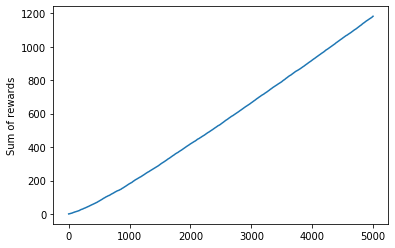

In [77]:
policyLinUCB = linUCB(0.05)
linucb_strategy_cumul = eval(context,tab_ann,policyLinUCB)

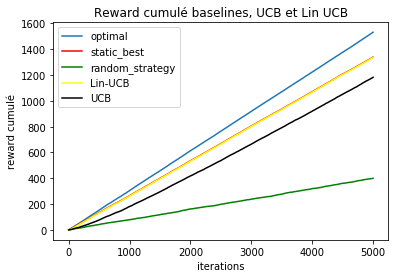

In [79]:
# Comparaison baseline UCB Lin UCB
plt.title("Reward cumulé baselines, UCB et Lin UCB")
plt.xlabel("iterations")
plt.ylabel("reward cumulé")
plt.plot(np.arange(len(data)), np.array(optimal_strategy_cumul), label="optimal")
plt.plot(np.arange(len(data)), np.array(static_best_strategy_cumul), label="static_best",color='red')
plt.plot(np.arange(len(data)), np.array(random_strategy_cumul), label="random_strategy",color='green')
plt.plot(np.arange(len(data)), np.array(ucb_strategy_cumul), label="Lin-UCB",color = 'yellow')
plt.plot(np.arange(len(data)), np.array(linucb_strategy_cumul), label="UCB",color = 'black')
plt.legend()
plt.show()